<a href="https://colab.research.google.com/github/LEOPR0123/Im-genes/blob/main/tareahistograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA DE HISTOGRAMA**
## *Integrantes:*
### Mariana López Villa, Leonardo Buitrago Roa

In [ ]:
!install matplotlib
!install numpy
!install imageio
!pip install opencv-python
!pip install pydicom

install: missing destination file operand after 'matplotlib'
Try 'install --help' for more information.
install: missing destination file operand after 'numpy'
Try 'install --help' for more information.
install: missing destination file operand after 'imageio'
Try 'install --help' for more information.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import os
import matplotlib.patches as patches
import cv2
import pydicom


In [ ]:
! wget https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png


--2025-02-16 17:16:45--  https://www.dropbox.com/s/qhm2ckjhrb84br3/nina.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/0q16egy0mm5u4dmokrvq6/nina.png?rlkey=idsx5c2l1q9jhnk4tym9qjhd0 [following]
--2025-02-16 17:16:45--  https://www.dropbox.com/scl/fi/0q16egy0mm5u4dmokrvq6/nina.png?rlkey=idsx5c2l1q9jhnk4tym9qjhd0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5670105b7129d5d88be2210cd9.dl.dropboxusercontent.com/cd/0/inline/CkNsx3_N54wn0RH7b8sIJTw8J0cfWmba5gPcpWjA5i52olInDJyxLDUZysD8TTRvwjttDTLG3GNEwu4h98fN0RKCXS5hYF9dVqEwDzFn2V4yekt3wryilhVG86IVd0VOjn5ftD00GCPzP0xD_5UtyuCC/file# [following]
--2025-02-16 17:16:45--  https://uc5670105b7129d5d88be2210cd9.dl.dropboxusercontent.com/cd/0/inline/CkNsx3_N54wn0

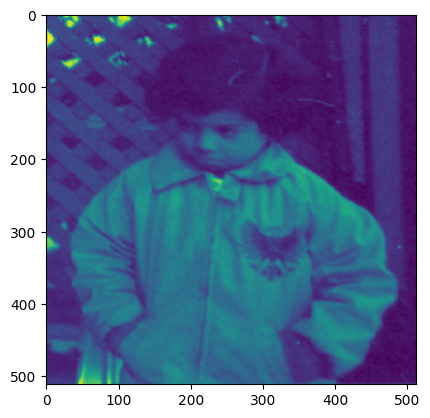

In [ ]:
#Visualizar imagen original
img = iio.imread('nina.png')
plt.imshow(img)
plt.show()

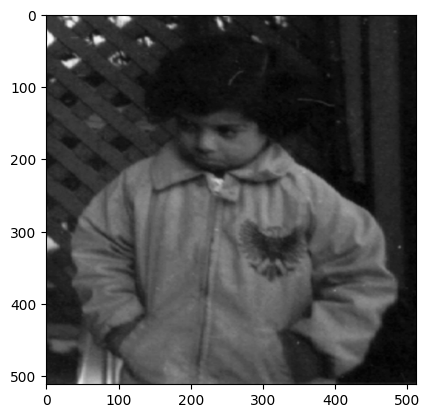

In [ ]:
#Convertir imagen original a escala de grises
X = img[:, :,]
plt.imshow(X, cmap= 'gray')
plt.show()

In [ ]:
#Histograma de la imagen en escala de grises
def visualizar_histograma(Imagen):
  """Visualiza el histograma de una imagen.

  Args:
    imagen: Una matriz NumPy que representa la imagen.
  """

  # Calcula el histograma de la imagen.
  histograma, bins = np.histogram(Imagen.flatten(), bins=256, range=[0, 256])

  # Crea una figura y un eje para el histograma.
  plt.figure()
  plt.title("Histograma de la imagen")
  plt.xlabel("Valor de píxel")
  plt.ylabel("Frecuencia")

  # Dibuja el histograma.
  plt.bar(bins[:-1], histograma, width=1)

  # Muestra el histograma.
  plt.show()

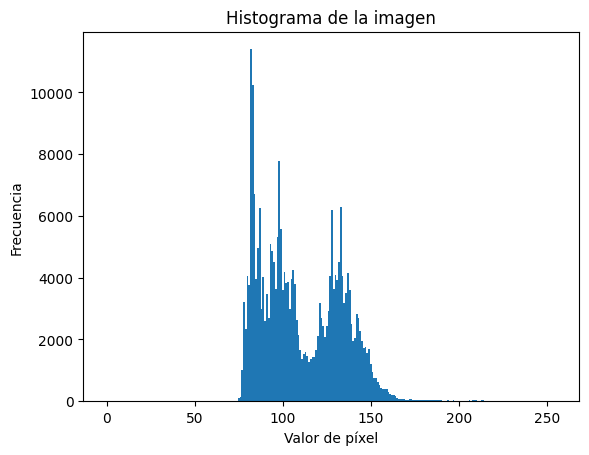

In [ ]:
visualizar_histograma(X)

# ***Analisis de histograma:***

***En la imagen original, se observa que esta en una configuracion de colores, por lo cual se vuelve con escalas de grises, en esta se observa que la imagen este con una intencidad baja, la cual se observa en el histograma, notando que la intencidad este entre 75 a 175, donde se puede observar que la mayor frecuencia es cercana del 75 en e valor del pixel.***

In [ ]:
#ECUALIZACIÓN DE HISTOGRAMA

def ecualizar_histograma_cv2(imagen):
    """
    Realiza la ecualización del histograma de una imagen en escala de grises usando OpenCV (cv2).

    Args:
        imagen: Una matriz NumPy que representa la imagen en escala de grises.

    Returns:
        La imagen ecualizada.
    """
    # Aplica la ecualización del histograma usando cv2.equalizeHist()
    imagen_ecualizada = cv2.equalizeHist(X)

    return imagen_ecualizada

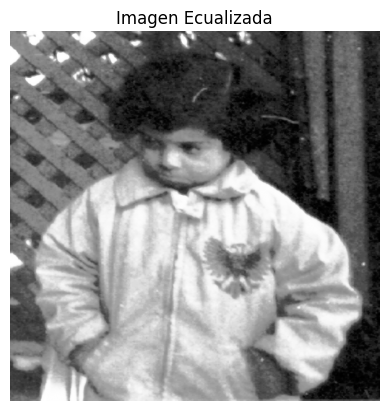

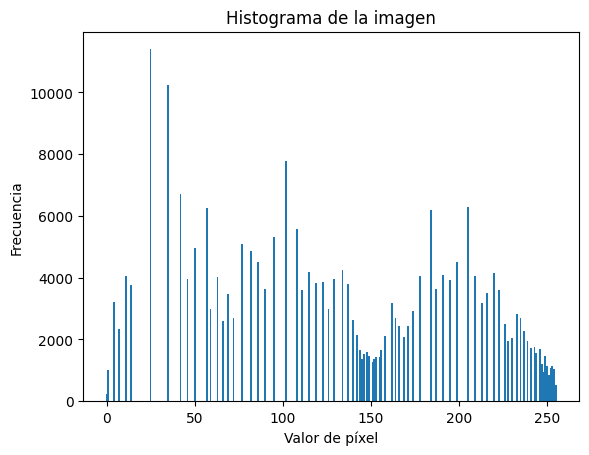

In [ ]:
imagen_ecualizada = ecualizar_histograma_cv2(X)
# Visualizar la imagen ecualizada
plt.imshow(imagen_ecualizada, cmap='gray')
plt.axis('off')
plt.title("Imagen Ecualizada")
plt.show()
# Histograma de la imagen ecualizada
visualizar_histograma(imagen_ecualizada)


 ***Analice si es posible texto en negrita modificar algún parámetro en la imagen antes de realizar la ecualización y documente su respuesta***

# ***Comente los efectos observados en la imagen:***

***Al ecualizar la imagen se  observar que mejora el contraste de esta, ya que la intensidad de los pixeles se distribuye de una manera más homogenea, dando como resultado una distribución en la escala de grises mas uniforme mejorando el aspecto de la imagen priginal.Esto se observa en el histograma donde se visualiza que las frecuencia son similares en un mayor rango de valores, en especial en los valores que se entornan en el 150 y 250***

In [ ]:

def ecualizacion_uniforme_v3(imagen):
    """
    Transforma el histograma de una imagen en una distribución uniforme
    usando operaciones de matrices en NumPy.

    Args:
        imagen: Una matriz NumPy que representa la imagen en escala de grises.

    Returns:
        La imagen con el histograma ecualizado.
    """

    # 1. Calcular el histograma y la CDF usando NumPy
    histograma, bins = np.histogram(imagen.flatten(), bins=256, range=[0, 256])
    cdf = histograma.cumsum()

    # 2. Normalizar la CDF para el rango de valores de píxeles (0-255)
    cdf_normalizada = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalizada = cdf_normalizada.astype(np.uint8)  # Convertir a tipo uint8

    # 3. Mapear los valores de píxeles originales a nuevos valores usando la CDF
    #    con indexación de matrices de NumPy
    imagen_ecualizada = cdf_normalizada[imagen]

    return imagen_ecualizada

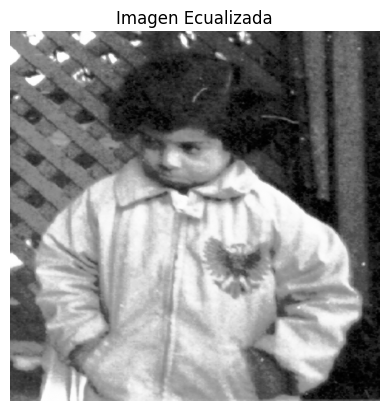

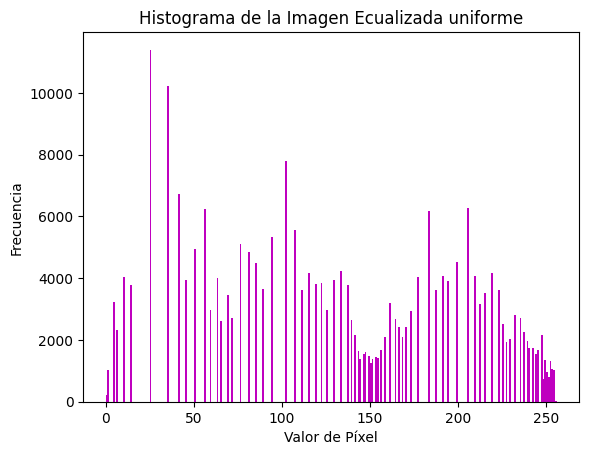

In [ ]:
imagen_ecualizada = ecualizacion_uniforme_v3(X)

# Visualizar la imagen ecualizada
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')
plt.show()

# Visualizar el histograma de la imagen ecualizada
plt.hist(imagen_ecualizada.flatten(), bins=256, range=[0, 256], color='m')
plt.title('Histograma de la Imagen Ecualizada uniforme')
plt.xlabel('Valor de Píxel')
plt.ylabel('Frecuencia')
plt.show()

# ***Comente los efectos observados en la imagen:***

***En el caso del histograma con ecualizacion uniforme, no se observa una gran diferencia entre la ecualizacion estandar y uniformada, sin embargo en los rangos mencionados en el histograma anterior, en los valores cercanos de 150 y 250, se observa que hay mayor dispercion de los valores de pixel, es decir que los valores tienen mayor uniformidad en cada espacio de la imagen***

# **IMÁGENES DICON**

In [ ]:
!wget -O diente.dcm "https://www.dropbox.com/scl/fi/xmszhfsv75b20lt406mlc/diente.dcm?rlkey=q702mz3yvl8tbe5414jy1lshd&st=2eciqjc7&dl=0"

--2025-02-16 17:16:51--  https://www.dropbox.com/scl/fi/xmszhfsv75b20lt406mlc/diente.dcm?rlkey=q702mz3yvl8tbe5414jy1lshd&st=2eciqjc7&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc344d03c995741b67377986d730.dl.dropboxusercontent.com/cd/0/inline/CkP6Rmb33IBvaQ5oHlsYyYGQicw6yzXjcWRr5Y4zs9rjkMFHD5DbLsGMnG4mmPSxk12Fvi4K1vL9SW3BJXSbS7PZjMwbuvkEVLSwQPQ9ixeqMk2aLvAb1GH0WyRt6HTSmCr7yN7X98wtOLjkoVNiL3xa/file# [following]
--2025-02-16 17:16:52--  https://uc344d03c995741b67377986d730.dl.dropboxusercontent.com/cd/0/inline/CkP6Rmb33IBvaQ5oHlsYyYGQicw6yzXjcWRr5Y4zs9rjkMFHD5DbLsGMnG4mmPSxk12Fvi4K1vL9SW3BJXSbS7PZjMwbuvkEVLSwQPQ9ixeqMk2aLvAb1GH0WyRt6HTSmCr7yN7X98wtOLjkoVNiL3xa/file
Resolving uc344d03c995741b67377986d730.dl.dropboxusercontent.com (uc344d03c995741b67377986d730.dl.dropboxusercontent.com)... 162.1

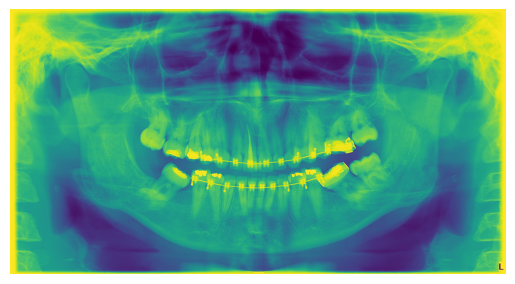

In [ ]:
import pydicom
import matplotlib.pyplot as plt

ds = pydicom.dcmread('diente.dcm')

plt.imshow(ds.pixel_array)
plt.axis('off')
plt.show()

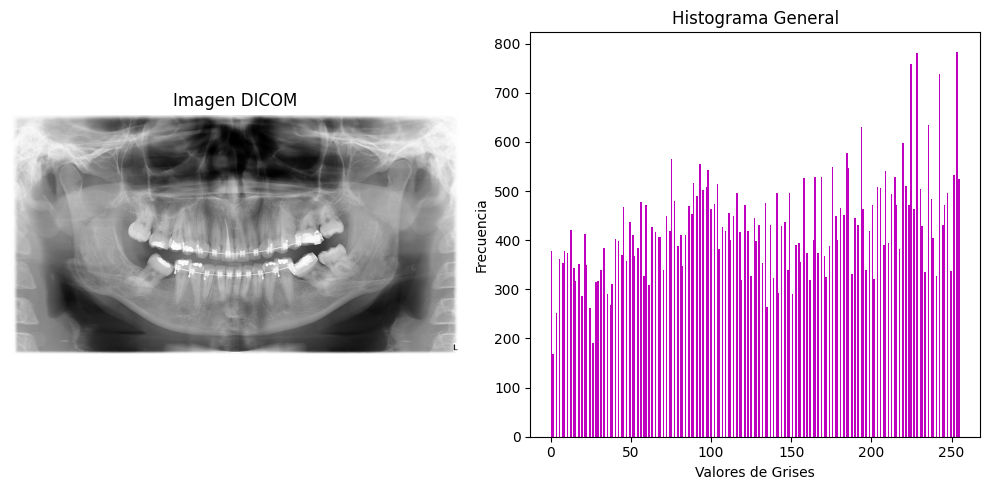

In [ ]:
import pydicom
import matplotlib.pyplot as plt

ds = pydicom.dcmread('diente.dcm')
pixel_data = ds.pixel_array.flatten()

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Ajusta figsize según tus necesidades

# Mostrar la imagen en el primer subplot
axes[0].imshow(ds.pixel_array, cmap=plt.cm.gray)
axes[0].set_title('Imagen DICOM')
axes[0].axis('off')  # Ocultar ejes de la imagen

# Mostrar el histograma en el segundo subplot
axes[1].hist(pixel_data, bins=256, range=(0, 255), color='m')
axes[1].set_title('Histograma General')
axes[1].set_xlabel('Valores de Grises')
axes[1].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

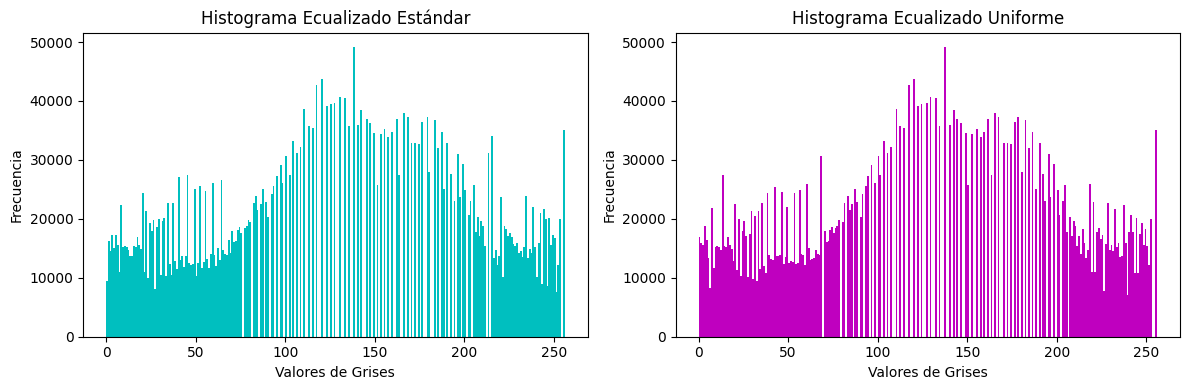

(-0.5, 2774.5, 1479.5, -0.5)

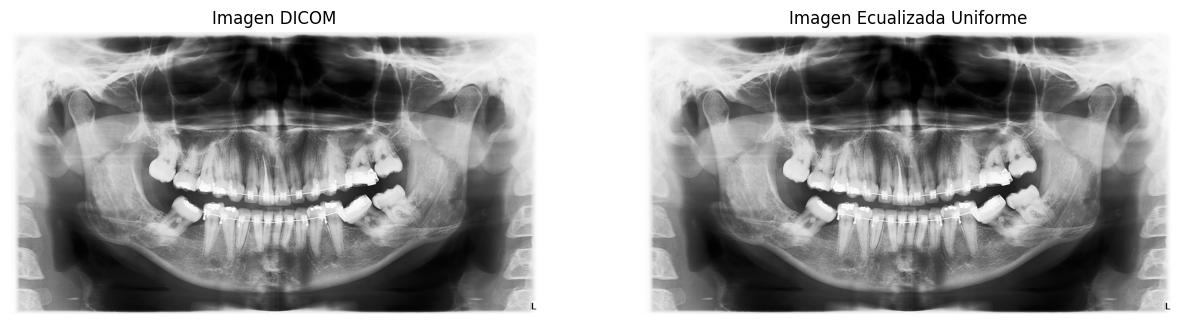

In [ ]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the DICOM image
ds = pydicom.dcmread('diente.dcm')
img = ds.pixel_array

# Convert the image to 8-bit unsigned integer
img = (img / img.max() * 255).astype(np.uint8)

# Apply standard histogram equalization
img_eq = cv2.equalizeHist(img)

# Plot the standard equalized histogram
plt.figure(figsize=(12, 4))  # Adjust figure size if needed
plt.subplot(1, 2, 1)
plt.hist(img_eq.flatten(), bins=256, range=(0, 256), color='c')
plt.title('Histograma Ecualizado Estándar')
plt.xlabel('Valores de Grises')
plt.ylabel('Frecuencia')

# Apply uniform histogram equalization
# Calculate the histogram and CDF
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()

# Normalize the CDF
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Map the pixel values using the normalized CDF
img_eq_uniform = cdf[img]

# Plot the uniform equalized histogram
plt.subplot(1, 2, 2)
plt.hist(img_eq_uniform.flatten(), bins=256, range=(0, 256), color='m')
plt.title('Histograma Ecualizado Uniforme')
plt.xlabel('Valores de Grises')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 8))  # Ajusta figsize según tus necesidades
plt.subplot(1, 2, 1)
plt.imshow(img_eq, cmap=plt.cm.gray)
plt.title('Imagen DICOM')
plt.axis('off')  # Ocultar ejes de la imagen

plt.subplot(1, 2, 2)
plt.imshow(img_eq_uniform, cmap=plt.cm.gray)
plt.title('Imagen Ecualizada Uniforme')
plt.axis('off')  # Ocultar ejes de la imagen

# ***Análisis de resultados:***
**En esta seccion se obserba una radiografia de una dentadura con un aparato de ortodoncia, al ecualizar el histograma, se diferencia con respecto a la original, debido a que se centraliza los valores de pixel, en el rango aproximado entre 75-200, ademas muestra un aumento en la frecuencia de cada valor.**

**Por otra parte, el histograma uniforme, con respecto al original se observa muy similar a la ecualizacion estadar, sin embargo se puede denotar una mayor ecualizacion en los valores bajos y altos, mostrando mejor la imagen de las zonas de interes, esto en el histograma se muestra una uniformidad en los rangos de 0-150 y 200-250.**
